[ -1.34382836e-02   1.02512044e+00   3.00725363e+01]
[[  8.81143038e-04  -1.33475244e-07  -2.19849040e-06]
 [ -1.33475244e-07   8.85728290e-04   1.30000692e-02]
 [ -2.19849040e-06   1.30000692e-02   5.69709042e-01]]


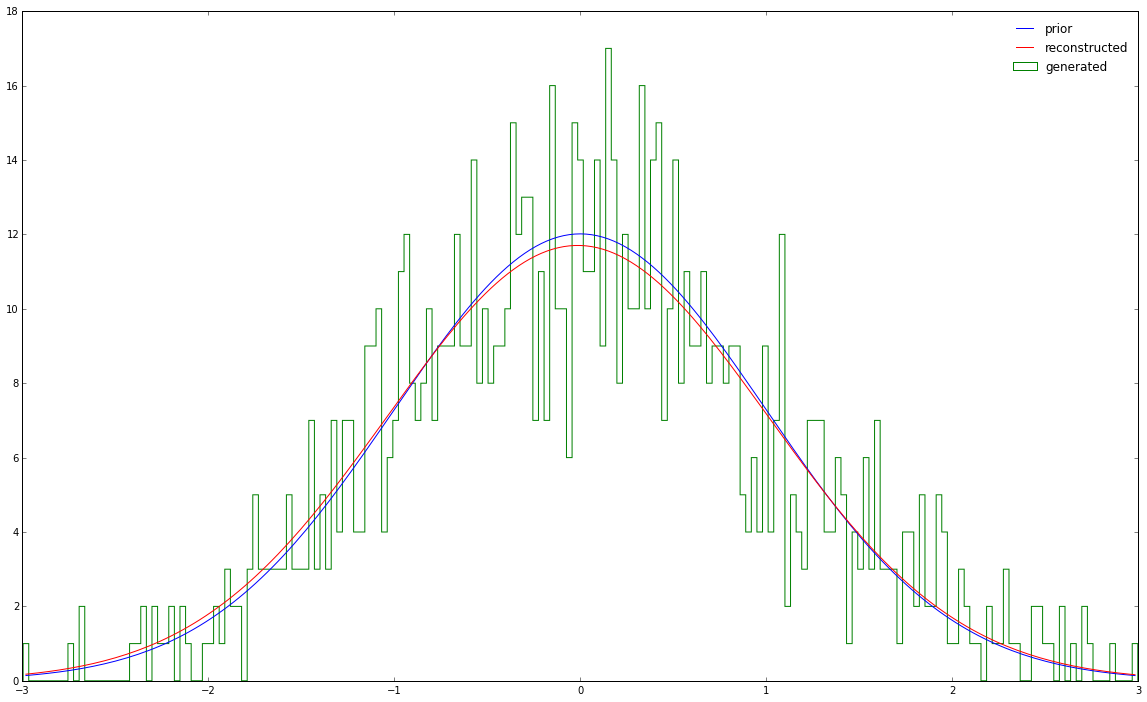

In [2]:
import numpy

import matplotlib # TODO bug in ipython? (sometime can't call the module directly)
from matplotlib import pyplot

import scipy
from scipy import stats
from scipy import optimize

# %matplotlib tk
# %matplotlib notebook ???
%matplotlib inline



# define unnormalized gaussian
def generalGaussian(x, mu, sigma, area):
    return area * scipy.stats.norm.pdf(x, mu, sigma)

# conversion between x ticks and bin delimiters and viceversa
def binDelimitersFromX(x):
    binSize = x[1] - x[0]
    binDelimiters = numpy.append(x, x[-1]+binSize) - 0.5*binSize
    return binDelimiters
def xFromBinDelimiters(binDelimiters):
    binSize = binDelimiters[1] - binDelimiters[0]
    x = numpy.delete(binDelimiters, -1) + 0.5*binSize
    return x

# define a function to fit histogram's results
def fitHistogram(f, histogramResults, dictAdditionalArguments={}):
    """
    f
        function to fit the histogram
    dictAdditionalArguments
        dictionary of additional arguments to pass to scipy.optimize.curve_fit(...)
        example: p0=startingValuesList --> {"p0": startingValues}
    histogramResults
        the result of matplotlib.pyplot.hist(...)
        or results of numpy.histogram(...)
    """
    # pay attention shift of half binSize
    binDelimiters = histogramResults[1]
    x = xFromBinDelimiters(binDelimiters)
    y = histogramResults[0]
    values, covariance = scipy.optimize.curve_fit(f, x, y, **dictAdditionalArguments)
    # unpack: (TODO just like pointers?)
    # *list
    # *touple
    # **dictionary
    return values, covariance





# function to use in the fit
f = generalGaussian

# prior parameters
muPrior = 0
sigmaPrior = 1

# montecarlo sample generation
sampleLenght = 1000
dataSample = numpy.random.normal(muPrior,sigmaPrior,sampleLenght)

# binning
bins=200
# TODO how many bins?
# vedere come l'accuratezza del fit
# varia con la grandezza della canalizzazione
# cercare canalizzazione ottimale:
# non troppo poco altrimenti si perdono dettagli sulla forma
# non troppo perché  si va in bassa statistica e si introduce rumore
# vedere optimal sampling con analogo discreto
# della frequenza di Nyquist sui canali
# vedere numero di canali in funzione del numero di dati che si hanno
binDelimiters = numpy.linspace(min(dataSample), max(dataSample), bins)
binSize = binDelimiters[1] - binDelimiters[0]

area = sampleLenght*binSize
priorParameters = muPrior, sigmaPrior, area




# initialize the figure
matplotlib.pyplot.figure(figsize=(20,12))

# create prior curve
x = xFromBinDelimiters(binDelimiters)
yPrior = f(x, *priorParameters)
matplotlib.pyplot.plot(x, yPrior, label="prior")

# make the histogram of the generated sample
histogramResults = matplotlib.pyplot.hist(dataSample, bins=binDelimiters, histtype="step", label="generated", align="mid")
# matplotlib.pyplot.axvline(x=min(dataSample))
# matplotlib.pyplot.axvline(x=max(dataSample))

# generalized fit
values, covariance = fitHistogram(f, histogramResults, {"p0": [muPrior, sigmaPrior, area]})
# TODO there's a problem in the gaussian fit documentation:
# muFit, sigmaFit = scipy.stats.norm.fit(dataSample) # area is missing

# plot fit results
print values
print covariance

# create reconstructed curve
yFit =  f(x, *values)
matplotlib.pyplot.plot(x, yFit, label="reconstructed")

# set the legend of the figure
matplotlib.pyplot.legend(loc='best', frameon=False)
# matplotlib.pyplot.show()

# matplotlib.pyplot.xscale('log')
# matplotlib.pyplot.yscale('log')
# la gaussiana è una parabola nel grafico log-log

